In [31]:
ls -l /home/user/Desktop/bent_wmedian_axis/cropped/bent_wmedian_9_9_9.raw-100.raw

-rw-rw-r-- 1 user user 10000 мая    7 17:07 /home/user/Desktop/bent_wmedian_axis/cropped/bent_wmedian_9_9_9.raw-100.raw


In [32]:
# import opencv and read files
import cv2
import numpy as np

def read_image(path):
    bytes = None
    with open(path, 'rb') as f:
        bytes = f.read()
    return np.fromstring(bytes, dtype=np.uint8).reshape(100, 100)

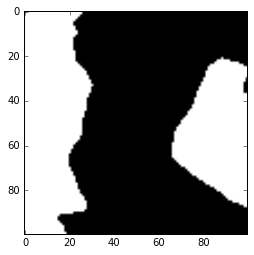

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

img = read_image('/home/user/Desktop/bent_wmedian_axis/cropped/bent_wmedian_9_9_9.raw-100.raw')
plt.imshow(img, cmap='gray')
type(img)
# create cenvas for pictures
canvas = np.zeros(img.shape, np.uint8)

{'mu02': 357042.0833712416, 'mu03': -716885.825837493, 'm11': 6800814.041666666, 'nu02': 0.16624468233780065, 'm12': 398795241.5, 'mu21': 280034.80785614904, 'mu20': 99579.49619962834, 'nu20': 0.046365855690609185, 'm30': 956864897.0, 'nu21': 0.0034060220864874113, 'mu11': -7840.5875080553815, 'mu12': 1035941.3579283394, 'nu11': -0.003650706850326942, 'nu12': 0.012600002022685004, 'm02': 4636039.916666666, 'm03': 288379043.45, 'm00': 1465.5, 'm01': 79188.83333333333, 'mu30': -310004.9620347023, 'nu30': -0.00377054465369635, 'nu03': -0.008719376619589944, 'm10': 126003.66666666666, 'm20': 10933372.75, 'm21': 589720599.0666666}


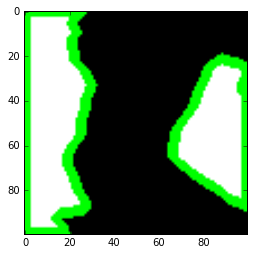

In [34]:
#Find contours
# cv2.drawContours(img, contours, -1, (0,255,0), 3)
# contours,hierarchy = cv2.findContours(img,2,1)
image, contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
imgColor = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(imgColor, contours, -1, (0,255,0), 3)
plt.imshow(imgColor)
#Hu = cv2.HuMoments(cv2.moments(img)).flatten()
#Calculate hull and defects 
# hull = cv2.convexHull(cnt,returnPoints = False)
# defects = cv2.convexityDefects(cnt,hull)
cnt = contours[0]
M = cv2.moments(cnt)
print M


In [35]:
area = cv2.contourArea(cnt)
print area

1465.5


In [36]:
perimeter = cv2.arcLength(cnt,True)
print perimeter

173.296463251


In [48]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
#plt.imshow(img, cnt, approx)
print approx
imgColor = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
#cv2.drawContours(imgColor, contours, -1, (0,255,0), 3)
img = cv2.drawContours(imgColor, approx, -1, (0,255,0), 3)
plt.imshow(imgColor)

[[[88 21]]

 [[66 65]]

 [[99 87]]]


error: /io/opencv/modules/imgproc/src/color.cpp:9765: error: (-215) scn == 1 && (dcn == 3 || dcn == 4) in function cvtColor


In [46]:
hull = cv2.convexHull(cnt)
#defects = cv2.convexityDefects(cnt,hull)
hull_false = cv2.convexHull(cnt,returnPoints = False)
print hull
print hull_false
k = cv2.isContourConvex(cnt)
print k

[[[99 87]]

 [[98 87]]

 [[93 85]]

 [[91 84]]

 [[75 73]]

 [[70 69]]

 [[66 65]]

 [[66 59]]

 [[67 54]]

 [[68 52]]

 [[82 25]]

 [[83 24]]

 [[86 22]]

 [[88 21]]

 [[95 23]]

 [[99 25]]]
[[50]
 [49]
 [45]
 [43]
 [33]
 [31]
 [30]
 [29]
 [27]
 [25]
 [ 5]
 [ 4]
 [ 2]
 [ 0]
 [62]
 [58]]
False


## HOG


In [39]:
# horizontal and vertical gradients
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

#magnitude and direction of gradient
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
